## Batch1 vs Batch 2 ctrl_vs_11mix top 500 genes

Importing libraries

In [1]:
import decoupler as dc
from scipy.stats import fisher_exact
import matplotlib.pyplot as plt
from matplotlib_venn import venn2


# Only needed for visualization:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from anndata import AnnData

Reading data from tsv Batch1 ctrl_vs_11mix IHWallGenes and Batch2 ctrl_vs_11mix IHWallGenes

Selecting only the TOP 100 GENES and the columns "log2FoldChange","pvalue","padj","gene_name"

In [2]:
# Batch1 ctrl_vs_11mix IHWallGenes and Batch2 ctrl_vs_11mix IHWallGenes
b1_ctrl_vs_11mix_all ="/data/projects/2021/MicrobialMetabolites/bacterial-supernatant/20_deseq2icbi/batch1/paired_grp/deseq2_ctrl_vs_11mix/11mix_ctrl_IHWallGenes.tsv"
b2_ctrl_vs_11mix_all = "/data/projects/2021/MicrobialMetabolites/bacterial-supernatant/20_deseq2icbi/batch2/paired_grp/deseq2_ctrl_vs_11mix/11mix_ctrl_IHWallGenes.tsv"

b1_ctrl_vs_11mix_all = pd.read_csv(b1_ctrl_vs_11mix_all, sep="\t")
b2_ctrl_vs_11mix_all = pd.read_csv(b2_ctrl_vs_11mix_all, sep="\t")

In [3]:
#B1 
b1_ctrl_vs_11mix_500 = b1_ctrl_vs_11mix_all.iloc[0:500,:]
b1_ctrl_vs_11mix_500 = b1_ctrl_vs_11mix_500[["log2FoldChange","pvalue","padj","gene_name"]]
# B2
b2_ctrl_vs_11mix_500 = b2_ctrl_vs_11mix_all.iloc[0:500,:]
b2_ctrl_vs_11mix_500 = b2_ctrl_vs_11mix_500[["log2FoldChange","pvalue","padj","gene_name"]]


Check that the genes only appear once 

In [4]:
b1_ctrl_vs_11mix_500["gene_name"].value_counts().max()

2

In [5]:
b2_ctrl_vs_11mix_500["gene_name"].value_counts().max()

1

Creating a dataframe for each batch with only gene_name information

In [6]:
b1_ctrl_vs_11mix_500_gene = pd.DataFrame(b1_ctrl_vs_11mix_500["gene_name"])

In [7]:
b1_ctrl_vs_11mix_500_gene

,gene_name
0,Selenom
1,Eml2
2,Atp2b4
3,Tnfaip2
4,Pllp
...,...
495,Lgmn
496,F3
497,Hspb1
498,Max


In [8]:
b2_ctrl_vs_11mix_500_gene = pd.DataFrame(b2_ctrl_vs_11mix_500["gene_name"])

In [9]:
b2_ctrl_vs_11mix_500_gene

,gene_name
0,Cxcl5
1,Igsf23
2,Ybx2
3,Lcn2
4,P3h4
...,...
495,Clca3a2
496,Sgcb
497,Cdipt
498,Slc51b


Finding common elements between the 2 datasets (b1 and b2 ctrl_vs_11mix)

In [10]:
common_b1_b2_ctrl_vs_11mix = list(set(b1_ctrl_vs_11mix_500_gene.gene_name) & set(b2_ctrl_vs_11mix_500_gene.gene_name))

In [11]:
# The union of the genes present in the All genes table from Batch1 and Batch2 
genes_universe = list(set(b1_ctrl_vs_11mix_all.gene_name) & set(b2_ctrl_vs_11mix_all.gene_name))

In [12]:
len(genes_universe)

15738

In [13]:
len(common_b1_b2_ctrl_vs_11mix)

144

In [14]:
common_b1_b2_ctrl_vs_11mix

['Ermp1',
 'Pik3r3',
 'Hras',
 'Tnrc18',
 'Hspb8',
 'S100a6',
 'Msh5',
 'Adam15',
 'Entpd4',
 'P3h4',
 'Degs2',
 'Casp1',
 'Ppfia3',
 'Tm4sf4',
 'Ppa1',
 'Cr1l',
 'Nyap1',
 'Leng9',
 'Ptpmt1',
 'Eml2',
 'Pim3',
 'Rnd2',
 'Ier3',
 'Slc4a7',
 'Creb3l1',
 'Lypd3',
 'Clic6',
 'Psmb10',
 'Tnnt2',
 'Utrn',
 'Mllt6',
 'Stap2',
 'Krt6a',
 'Ces2g',
 'Ocel1',
 'Ddah2',
 'Tmem37',
 'Pllp',
 'AA986860',
 'Misp3',
 'Adgrl1',
 'Il1rn',
 'Tmem9',
 'Fam111a',
 'Nucb2',
 'Clca3b',
 '5930430L01Rik',
 'Nfic',
 'Bri3bp',
 'Ppp1r18',
 'Tceal9',
 'Gsto1',
 '5730419F03Rik',
 'Pdlim4',
 'Cox7a1',
 'Kctd12',
 'Fam3c',
 'Ifnar2',
 'Tac1',
 'Mettl26',
 'Pbp2',
 'Rilpl1',
 '2010010A06Rik',
 'Lsm8',
 'Sult4a1',
 'Lratd1',
 'Slc25a34',
 'Rnf208',
 'Sult1b1',
 'Gm15657',
 'Ubxn6',
 'P2ry1',
 'Rab7b',
 'Krt80',
 'Crybg1',
 'Slc25a23',
 'Rundc3a',
 'Ms4a8a',
 'Tmem125',
 'Bcorl1',
 'Mxd4',
 'Pdxdc1',
 'Cd68',
 'Gm44274',
 'Bex3',
 'H2-DMa',
 'Faap100',
 'Lmtk3',
 'Dipk1b',
 'Gm5914',
 'Fam171a2',
 'Spag7',
 'Cxcl1',
 

In [15]:
b1_common = b1_ctrl_vs_11mix_500[b1_ctrl_vs_11mix_500["gene_name"].isin(common_b1_b2_ctrl_vs_11mix)]
b1_common

,log2FoldChange,pvalue,padj,gene_name
0,2.071643,1.656087e-15,2.053267e-11,Selenom
1,1.224582,4.176438e-15,2.053267e-11,Eml2
2,1.750809,2.762797e-12,1.226861e-08,Atp2b4
4,-1.054247,3.238075e-11,4.020306e-08,Pllp
6,-1.766609,5.544433e-11,1.780093e-07,Ces2f
...,...,...,...,...
459,1.024334,1.780059e-03,5.175122e-02,Fam171a2
464,1.567958,1.876134e-03,2.264775e-01,Rab7b
465,-1.379781,1.876577e-03,5.779146e-02,Lrrc49
492,1.227146,2.132131e-03,5.761604e-02,Ttyh1


In [16]:
b2_common = b2_ctrl_vs_11mix_500[b2_ctrl_vs_11mix_500["gene_name"].isin(common_b1_b2_ctrl_vs_11mix)]
b2_common

,log2FoldChange,pvalue,padj,gene_name
2,2.055145,1.150704e-14,5.891130e-11,Ybx2
4,2.661808,1.618199e-12,3.653247e-09,P3h4
6,2.395671,9.894686e-11,4.012838e-07,Selenom
7,3.606253,1.770183e-10,2.650514e-07,Misp3
9,1.611802,4.722131e-10,5.164460e-07,Rnd2
...,...,...,...,...
482,-0.972808,1.655031e-03,8.191288e-02,Sult1b1
487,-1.536126,1.692645e-03,3.280228e-02,Spc25
488,-0.871286,1.705520e-03,6.351478e-02,Ocel1
493,-0.875498,1.731680e-03,6.011583e-02,Ly6g2


### Fisher exact test
Test if the number of common genes is larger than what would be obtained by chance

In [17]:
b1_and_b2 = len(common_b1_b2_ctrl_vs_11mix)
notb1_onlyb2 = 500 - b1_and_b2 
notb2_onlyb1 = 500 - b1_and_b2 
notb1_notb2 = len(genes_universe)
oddsratio, pvalue = fisher_exact([[b1_and_b2, notb1_onlyb2], [notb2_onlyb1, notb1_notb2]])
pvalue

7.343389501713966e-104

In [18]:
oddsratio

17.881833101881075

The p value is less than 5% (0.05), therefore we conclude that our observation is statistically significant. 
### The number of intersected genes is higher than what we would expect by random chance.  

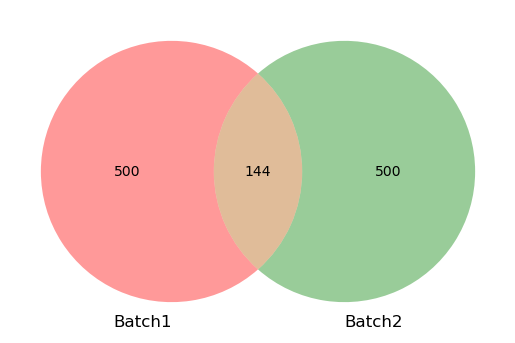

In [19]:
# Plot intersection
venn2(subsets = (len(b1_ctrl_vs_11mix_500), len(b2_ctrl_vs_11mix_500), len(common_b1_b2_ctrl_vs_11mix)), set_labels = ('Batch1', 'Batch2'))
plt.show()